## 1. Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = 'Arial'


## 1. Statistics of the Source Corpus (contemporary)

### 1.1 Tokens

In [2]:
sources_clpl = pd.read_csv('../output/sources_clpl/sources_clpl_2022_del.csv', sep=';', index_col=0)
sources_clpl.head()

,Batch,doc,doc_author,contemporain,page_start,scans,scans-annotated,Subcorpus,tokens_total,source,receiver,perception,written,heard,seen,else,year
10,DBNL,1558_Bosc_Cupe,1558_Bosc_Cupe,n,55,228.0,228.0,1.0,61445,33,6,4,0,3,1,0,1558
15,DBNL,1568_Gent_Vaer,1568_Gent_Vaer,y,1,223.0,58.0,0.0,128230,91,15,71,8,54,8,1,1568
19,DBNL,1574_Antw_EykP,1574_Antw_EykP,n,43,125.0,125.0,1.0,50834,11,13,15,0,11,4,0,1574
20,DBNL,1574_Antw_Haec,1574_Antw_Haec,y,1,357.0,147.0,0.0,115893,67,24,43,4,34,5,0,1574
21,DBNL,1575_Antw_Ulle,1575_Antw_Ulle,n,37,131.0,130.0,1.0,60285,5,10,11,1,8,2,0,1575


In [3]:
sources_clpl['sources-norm'] = sources_clpl['source']/sources_clpl['tokens_total']
sources_clpl['receivers-norm'] = sources_clpl['receiver']/sources_clpl['tokens_total']
sources_clpl['perceptions-norm'] = sources_clpl['perception']/sources_clpl['tokens_total']

In [4]:
sources_clpl['cut'] = pd.cut(sources_clpl['year'], np.arange(1550, 1950, 50))
sources_clpl['cut'] = sources_clpl['cut'].astype(str)
sources_clpl['cut'] = sources_clpl['cut'].replace(['(1850, 1900]', '(1800, 1850]'], '(1800, 1856]')
sources_clpl.groupby('cut')['cut'].count()

cut
(1550, 1600]     9
(1600, 1650]     6
(1650, 1700]    15
(1700, 1750]    12
(1750, 1800]    22
(1800, 1856]    21
Name: cut, dtype: int64

In [5]:
sources_author = sources_clpl.groupby(['doc_author', 'year', 'cut'])['tokens_total', 'source', 'receiver', 'perception', 'written', 'heard', 'seen', 'else'].sum().reset_index()

/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/ipykernel_89404/2330320859.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sources_author = sources_clpl.groupby(['doc_author', 'year', 'cut'])['tokens_total', 'source', 'receiver', 'perception', 'written', 'heard', 'seen', 'else'].sum().reset_index()


In [6]:
sources_author['sources-norm'] = sources_author['source']/sources_author['tokens_total']
sources_author['receivers-norm'] = sources_author['receiver']/sources_author['tokens_total']
sources_author['perceptions-norm'] = sources_author['perception']/sources_author['tokens_total']

In [7]:
sources_author.sum()
#sources_author.groupby('cut')['source', 'receiver', 'perception', 'written', 'heard', 'seen', 'else'].sum()

doc_author          1558_Bosc_Cupe1568_Gent_Vaer1574_Antw_EykP1574...
year                                                           114046
cut                 (1550, 1600](1550, 1600](1550, 1600](1550, 160...
tokens_total                                                  4165883
source                                                           6167
receiver                                                         1597
perception                                                       3391
written                                                           521
heard                                                            1935
seen                                                              884
else                                                               49
sources-norm                                                 0.106349
receivers-norm                                               0.030403
perceptions-norm                                             0.066636
dtype: object

### 1.2 Relative number of labels

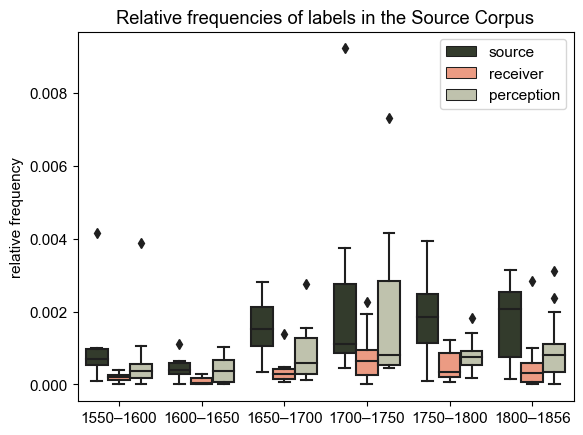

In [8]:
fig, axs = plt.subplots()
#palette = ['gold', 'darkolivegreen', 'red']
palette = ['#333D29', '#FC9272', '#C2C5AA']

df_plot = sources_author.melt(id_vars='cut', value_vars=['sources-norm', 'receivers-norm', 'perceptions-norm'])

sns.boxplot(x='cut', y='value', hue='variable', data=df_plot, palette=palette, showfliers=True)
#ax1 = sns.stripplot(x='cut', y='value', hue='variable', data=df_plot, jitter=True, color='black')
axs.set_title('Relative frequencies of labels in the Source Corpus')
axs.set_ylabel('relative frequency')
axs.xaxis.label.set_visible(False)
axs.set_xticklabels(['1550–1600', '1600–1650', '1650–1700', '1700–1750', '1750–1800', '1800–1856'], rotation=0)


handles, labels = axs.get_legend_handles_labels()
labels = 'source', 'receiver', 'perception'
axs.legend(handles, labels)

plt.savefig('../images/rel_boxplot_labels_fliers_del.pdf', bbox_inches='tight')

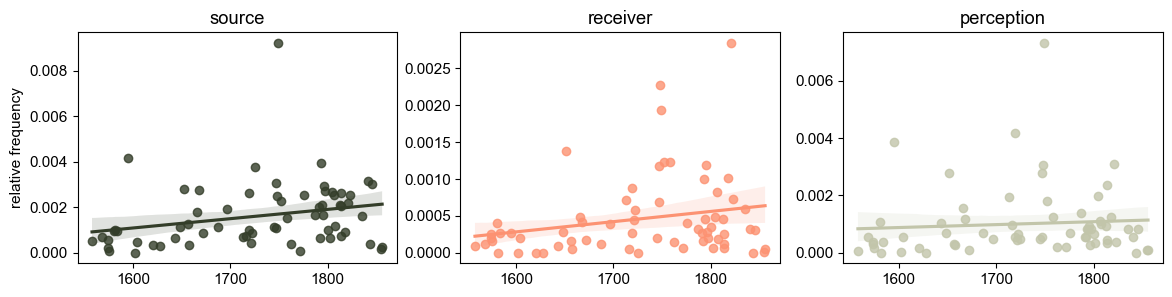

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

sns.regplot(x='year', y='sources-norm', data=sources_author, ax=ax[0], color='#333D29')
ax[0].set_ylabel('relative frequency')
ax[0].set_title('source')
ax[0].set_xlabel('')

sns.regplot(x='year', y='receivers-norm', data=sources_author, ax=ax[1], color='#FC9272')
ax[1].set_ylabel('')
ax[1].set_title('receiver')
ax[1].set_xlabel('')

sns.regplot(x='year', y='perceptions-norm', data=sources_author, ax=ax[2], color='#C2C5AA')
ax[2].set_ylabel('')
ax[2].set_title('perception')
ax[2].set_xlabel('')

plt.savefig('../images/scatter-labels.pdf', bbox_inches='tight')


### 1.3 Relative number of perceptions

In [10]:
sources_clpl['written-norm'] = sources_clpl['written']/sources_clpl['tokens_total']
sources_clpl['heard-norm'] = sources_clpl['heard']/sources_clpl['tokens_total']
sources_clpl['seen-norm'] = sources_clpl['seen']/sources_clpl['tokens_total']
sources_clpl['else-norm'] = sources_clpl['else']/sources_clpl['tokens_total']

In [11]:
sources_author['written-norm'] = sources_author['written']/sources_author['tokens_total']
sources_author['heard-norm'] = sources_author['heard']/sources_author['tokens_total']
sources_author['seen-norm'] = sources_author['seen']/sources_author['tokens_total']
sources_author['else-norm'] = sources_author['else']/sources_author['tokens_total']

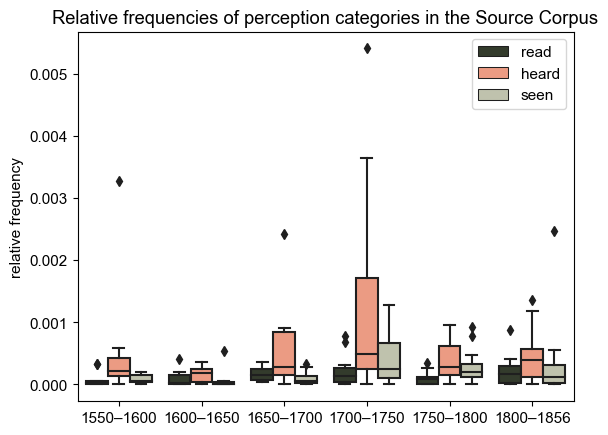

In [12]:
fig, axs = plt.subplots()
palette = ['#333D29', '#FC9272', '#C2C5AA']

df_plot = sources_author.melt(id_vars='cut', value_vars=['written-norm', 'heard-norm', 'seen-norm'])

sns.boxplot(x='cut', y='value', hue='variable', data=df_plot, palette=palette, showfliers=True)
axs.set_title('Relative frequencies of perception categories in the Source Corpus')
axs.set_ylabel('relative frequency')
axs.xaxis.label.set_visible(False)
axs.set_xticklabels(['1550–1600', '1600–1650', '1650–1700', '1700–1750', '1750–1800', '1800–1856'], rotation=0)


handles, labels = axs.get_legend_handles_labels()
labels = 'read', 'heard', 'seen'
axs.legend(handles, labels)

plt.savefig('../images/rel_boxplot_perceptions_fliers_del.pdf', bbox_inches='tight')

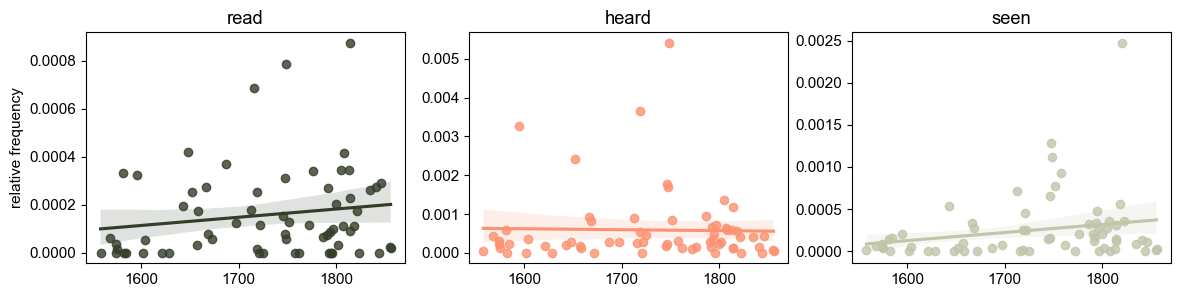

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

sns.regplot(x='year', y='written-norm', data=sources_author, color = '#333D29', ax=ax[0])
ax[0].set_ylabel('relative frequency')
ax[0].set_title('read')
ax[0].set_xlabel('')

sns.regplot(x='year', y='heard-norm', data=sources_author, color = '#FC9272', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('heard')
ax[1].set_xlabel('')

sns.regplot(x='year', y='seen-norm', data=sources_author, color = '#C2C5AA', ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('seen')
ax[2].set_xlabel('')

plt.savefig('../images/scatter-perceptions.pdf', bbox_inches='tight')

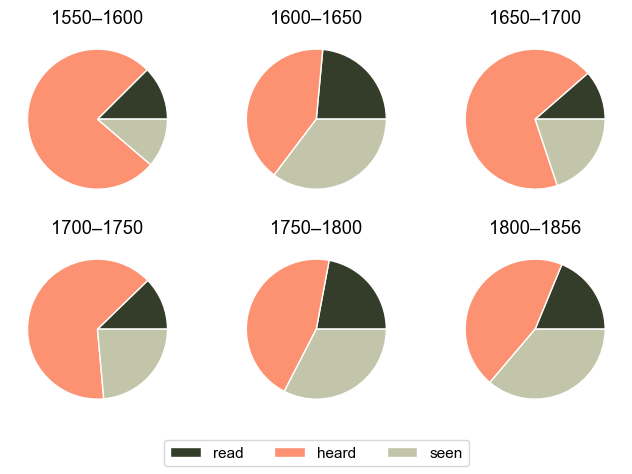

In [14]:
sources_pie = sources_author.groupby('cut')[['written', 'heard', 'seen']].sum().reset_index().drop(columns=['cut'])

fig, (axes) = plt.subplots(2, 3, figsize=(8,5))
wedgeprops = { 'linewidth': 1, 'edgecolor' : 'white'}
#palette = ['#e31a1c', '#fc9272', '#fee0d2']
palette = ['#333D29', '#FC9272', '#C2C5AA']
 
#autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else ''

ax1 = sources_pie.iloc[0].plot.pie(ax = axes[0,0], wedgeprops=wedgeprops, colors=palette, labels=None)
ax1.set_title('1550–1600')
ax1.yaxis.label.set_visible(False)

ax2 = sources_pie.iloc[1].plot.pie(ax = axes[0,1], wedgeprops=wedgeprops, colors=palette, labels=None)
ax2.set_title('1600–1650')
ax2.yaxis.label.set_visible(False)

ax3 = sources_pie.iloc[2].plot.pie(ax = axes[0,2], wedgeprops=wedgeprops, colors=palette, labels=None)
ax3.set_title('1650–1700')
ax3.yaxis.label.set_visible(False)

ax4 = sources_pie.iloc[3].plot.pie(ax = axes[1,0], wedgeprops=wedgeprops, colors=palette, labels=None)
ax4.set_title('1700–1750')
ax4.yaxis.label.set_visible(False)

ax5 = sources_pie.iloc[4].plot.pie(ax = axes[1,1], wedgeprops=wedgeprops, colors=palette,  labels=None)
ax5.set_title('1750–1800')
ax5.yaxis.label.set_visible(False)

ax6 = sources_pie.iloc[5].plot.pie(ax = axes[1,2], wedgeprops=wedgeprops, colors=palette, labels=None)
ax6.set_title('1800–1856')
ax6.yaxis.label.set_visible(False)

labels = 'read', 'heard', 'seen'
fig.legend(labels, loc = 'lower center', ncol=3)
#fig.suptitle('Relative frequencies per period of perception categories in $Source$ $Corpus$')
plt.savefig('../images/piechart_perceptions.pdf', bbox_inches='tight')